In [1]:
import cv2
import numpy as np
import pykitti
import os
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
def extract_features(frame):
    global orb
    if orb is None:
        orb = cv2.ORB_create()
    return cv2.goodFeaturesToTrack(frame,256,0.01,10)

In [6]:
def show_features(frame, features):
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
    
    for i in extract_features(frame):
        x,y = i.ravel()
        cv2.circle(frame_rgb,(int(x),int(y)),5,255,-1)
    
    return frame_rgb

In [13]:
root = Path('sample')
drive = '00'

seq_path = root / 'data_odometry_gray' / 'dataset' / drive / 'image_0'
frames = sorted(os.listdir(seq_path))

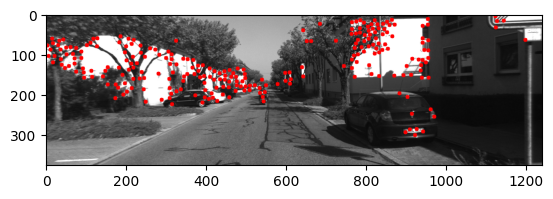

In [16]:


frame = cv2.imread(str(seq_path / frames[0]), cv2.IMREAD_UNCHANGED)
plt.imshow(show_features(frame, extract_features(frame)))
plt.show()

In [ ]:
def frame_transform(frames, projection):
    t_0 = frames[0]
    t_1 = frames[1]
    